In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn import model_selection

x_data = mnist.data
y_data = mnist.target

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(56000, 784)
(56000,)
(14000, 784)
(14000,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

In [ ]:
from keras import layers, models

AE.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_24 (Dense)            (None, 500)               392500    
                                                                 
 dense_25 (Dense)            (None, 300)               150300    
                                                                 
 dense_26 (Dense)            (None, 100)               30100     
                                                                 
 dense_27 (Dense)            (None, 300)               30300     
                                                                 
 dense_28 (Dense)            (None, 500)               150500    
                                                                 
 dense_29 (Dense)            (None, 784)               3927

In [ ]:
history = AE.fit(x_train_scaled, x_train_scaled, validation_data=[x_test_scaled, x_test_scaled], batch_size = 32, epochs = 20)

Epoch 1/20
1750/1750 [==============================] - 34s 18ms/step - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 2/20
1750/1750 [==============================] - 34s 20ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 3/20
1750/1750 [==============================] - 33s 19ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 4/20
1750/1750 [==============================] - 32s 18ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 5/20
1750/1750 [==============================] - 32s 18ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 6/20
1750/1750 [==============================] - 30s 17ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoc

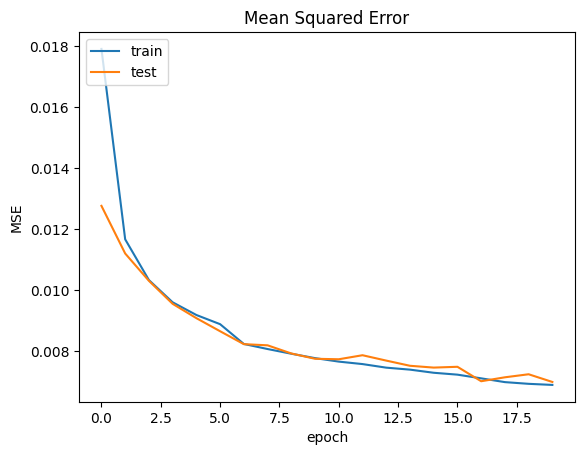

In [ ]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

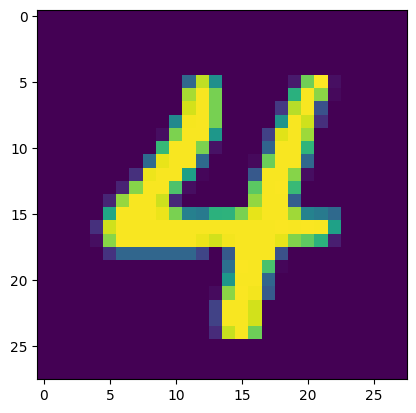

In [ ]:
plt.imshow(x_test_scaled[1].reshape(28,28))

1/1 [==============================] - 0s 77ms/step


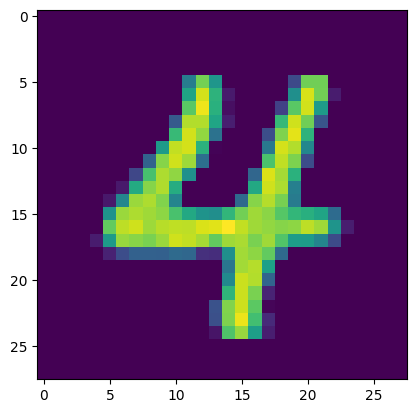

In [ ]:
decoded_img = AE.predict(x_test_scaled[1].reshape(1, 28*28))
plt.imshow(decoded_img.reshape(28, 28))

In [ ]:
from keras import layers, models

input_shape = (28*28, )

input = layers.Input(input_shape)
encoder1 = layers.Dense(500, activation = 'relu')(input)
encoder2 = layers.Dense(300, activation = 'relu')(encoder1)
encoder3 = layers.Dense(100, activation = 'relu')(encoder2)

decoder1 = layers.Dense(300, activation = 'relu')(encoder3)
decoder2 = layers.Dense(500, activation = 'relu')(decoder1)
output = layers.Dense(28*28, activation = 'relu')(decoder2)

DAE = models.Model(input, output)
DAE.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics=['mean_squared_error'])

In [ ]:
x_train_noisy = x_train_scaled + np.random.normal(0, 1, size=(x_train_scaled.shape[0], 28*28))
x_test_noisy = x_test_scaled + np.random.normal(0, 1, size=(x_test_scaled.shape[0], 28*28))

In [ ]:
history = DAE.fit(x_train_noisy, x_train_scaled, validation_data = [x_test_noisy, x_test_scaled], batch_size = 32, epochs = 20)

Epoch 1/20
1750/1750 [==============================] - 33s 18ms/step - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 2/20
1750/1750 [==============================] - 30s 17ms/step - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 3/20
1750/1750 [==============================] - 31s 18ms/step - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 4/20
1750/1750 [==============================] - 31s 18ms/step - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 5/20
1750/1750 [==============================] - 31s 18ms/step - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0333 - val_mean_squared_error: 0.0333
Epoch 6/20
1750/1750 [==============================] - 33s 19ms/step - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0332 - val_mean_squared_error: 0.0332
Epoc

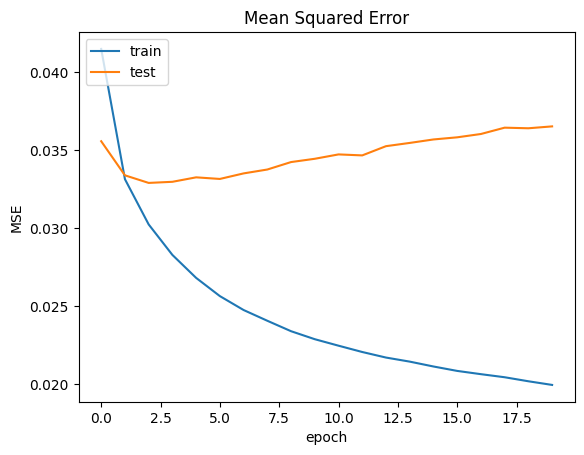

In [ ]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

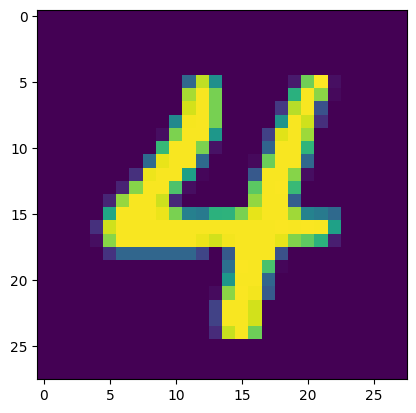

In [ ]:
plt.imshow(x_test_scaled[1].reshape(28, 28))

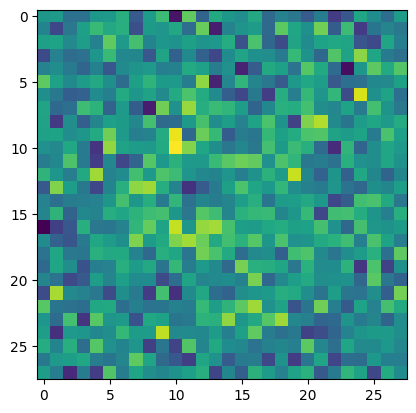

In [ ]:
plt.imshow(x_test_noisy[1].reshape(28, 28))

1/1 [==============================] - 0s 74ms/step


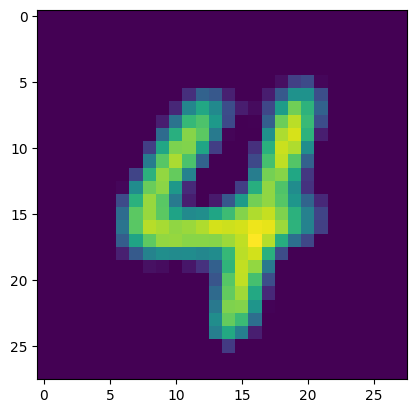

In [ ]:
decoded_img = DAE.predict(x_test_scaled[1].reshape(1, 28*28))
plt.imshow(decoded_img.reshape(28, 28))

In [ ]:
x_train_scaled = x_train_scaled.reshape((-1, 28, 28, 1))
x_test_scaled = x_test_scaled.reshape((-1, 28, 28, 1))

input_shape = (28, 28, 1)

input = layers.Input(input_shape)
conv_enc = layers.Conv2D(1, (3, 3), padding='same', activation='relu')(input)
pooling_enc = layers.MaxPooling2D((2, 2))(conv_enc)
flatten_enc = layers.Flatten()(pooling_enc)
dense_enc = layers.Dense(100, activation = 'relu')(flatten_enc)

dense_dec = layers.Dense(14*14, activation = 'relu')(dense_enc)
dense_dec = tf.reshape(dense_dec, (-1, 14, 14, 1))
upsample_dec = layers.UpSampling2D()(dense_dec)
deconv_dec = layers.Conv2DTranspose(1, (3, 3), padding='same', activation='sigmoid')(upsample_dec)
output = deconv_dec

In [ ]:
CAE = models.Model(input, output)
CAE.compile(optimizer='Adam', loss = 'mean_squared_error', metrics=['mean_squared_error'])
CAE.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 1)         10        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 1)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 196)               0         
                                                                 
 dense_41 (Dense)            (None, 100)               19700     
                                                                 
 dense_42 (Dense)            (None, 196)               19796     
                                                           

In [ ]:
history = CAE.fit(x_train_scaled, x_train_scaled, validation_data = [x_test_scaled, x_test_scaled], batch_size = 32, epochs = 20)

Epoch 1/20
1750/1750 [==============================] - 37s 20ms/step - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 2/20
1750/1750 [==============================] - 31s 18ms/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 3/20
1750/1750 [==============================] - 32s 18ms/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 4/20
1750/1750 [==============================] - 33s 19ms/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 5/20
1750/1750 [==============================] - 31s 18ms/step - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 6/20
1750/1750 [==============================] - 34s 19ms/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoc

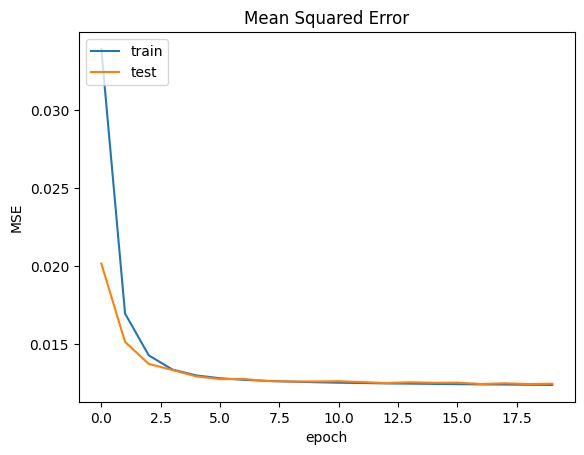

In [ ]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

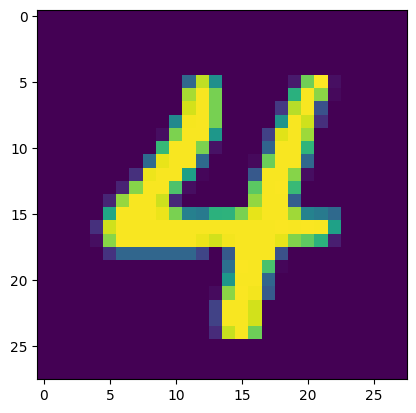

In [ ]:
plt.imshow(x_test_scaled[1].reshape(28, 28))

1/1 [==============================] - 0s 147ms/step


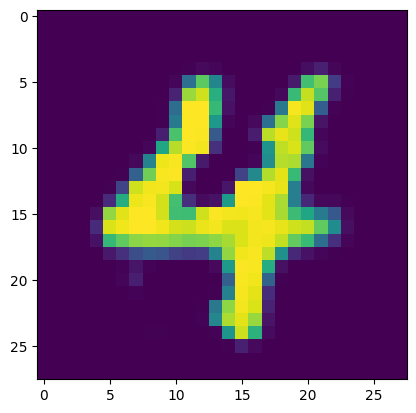

In [ ]:
decoded_img = CAE.predict(x_test_scaled[1].reshape(1, 28, 28, 1))
plt.imshow(decoded_img.reshape(28, 28))

In [ ]:
class Sampling(layers.Layer):

  def call(self, inputs):
    z_mean, z_log_var = inputs
    epsilon = tf.random.normal(shape=tf.shape(z_mean))

    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [ ]:
x_train_scaled = x_train_scaled.reshape((-1, 28*28))
x_test_scaled = x_test_scaled.reshape((-1, 28*28))

latent_dim = 5

input_shape = (28*28, )

input = layers.Input(input_shape)
encoder1 = layers.Dense(300, activation = 'relu')(input)
encoder2 = layers.Dense(100, activation = 'relu')(encoder1)
encoder3 = layers.Dense(20, activation = 'relu')(encoder2)

z_mean = layers.Dense(latent_dim)(encoder3)
z_log_var = layers.Dense(latent_dim)(encoder3)
z = Sampling()([z_mean, z_log_var])

decoder1 = layers.Dense(20, activation = 'relu')(z)
decoder2 = layers.Dense(100, activation = 'relu')(decoder1)
decoder3 = layers.Dense(300, activation = 'relu')(decoder2)
output = layers.Dense(28*28, activation = 'relu')(decoder3)

In [ ]:
VAE = models.Model(input, output)
VAE.compile(optimizer='Adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])
VAE.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 784)]        0           []                               
                                                                                                  
 dense_55 (Dense)               (None, 300)          235500      ['input_13[0][0]']               
                                                                                                  
 dense_56 (Dense)               (None, 100)          30100       ['dense_55[0][0]']               
                                                                                                  
 dense_57 (Dense)               (None, 20)           2020        ['dense_56[0][0]']               
                                                                                            

In [ ]:
history = VAE.fit(x_train_scaled, x_train_scaled, validation_data = [x_test_scaled, x_test_scaled], batch_size = 32, epochs = 20)

Epoch 1/20
1750/1750 [==============================] - 20s 11ms/step - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 2/20
1750/1750 [==============================] - 17s 10ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 3/20
1750/1750 [==============================] - 17s 10ms/step - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 4/20
1750/1750 [==============================] - 19s 11ms/step - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 5/20
1750/1750 [==============================] - 17s 10ms/step - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 6/20
1750/1750 [==============================] - 17s 10ms/step - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoc

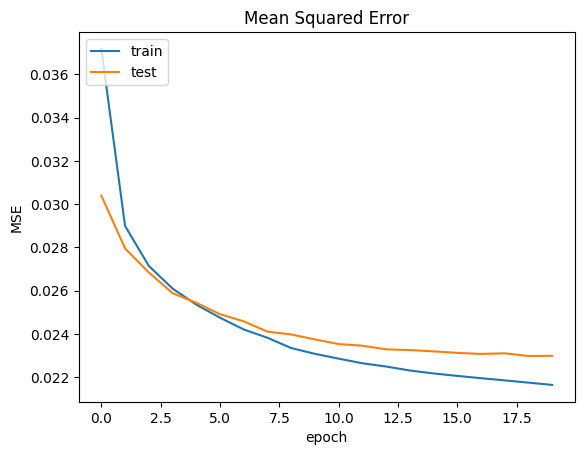

In [ ]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

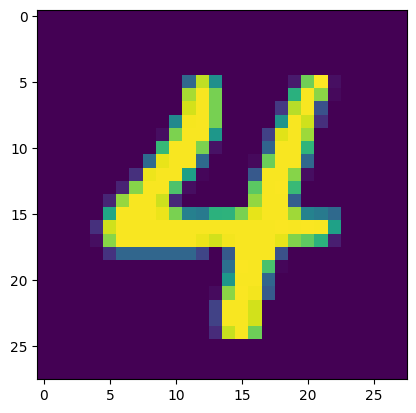

In [ ]:
plt.imshow(x_test_scaled[1].reshape(28, 28))

1/1 [==============================] - 0s 115ms/step


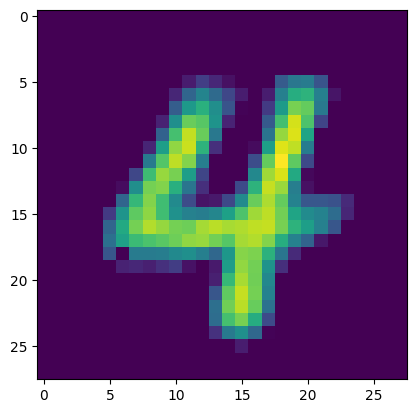

In [ ]:
decoded_img = VAE.predict(x_test_scaled[1].reshape(1, 28*28))
plt.imshow(decoded_img.reshape(28, 28))